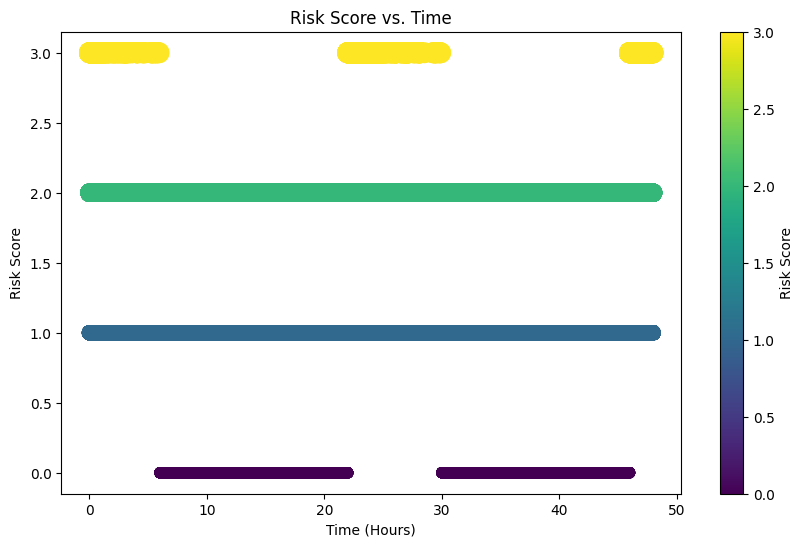

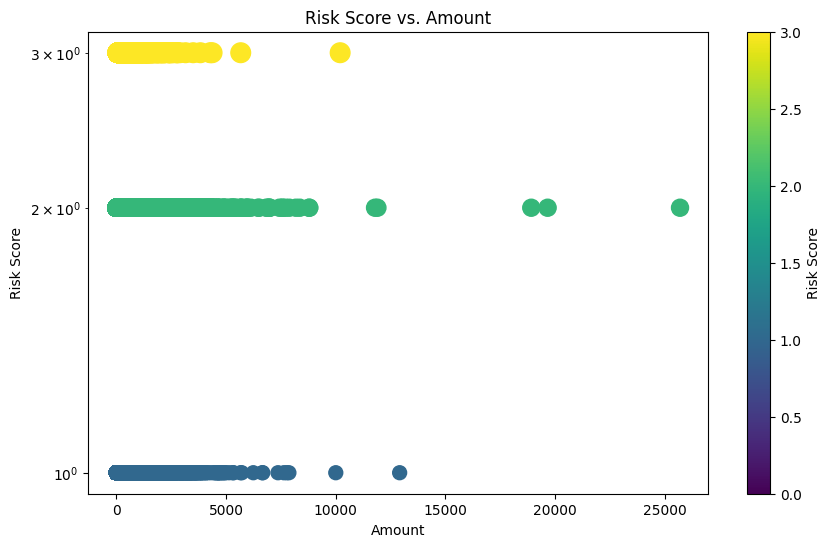

Training accuracy: 1.00
Test accuracy: 1.00
Confusion Matrix:
 [[56864     0]
 [   98     0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\4837383\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\4837383\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\4837383\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# Load and prepare the dataset
df = pd.read_csv('creditcard.csv')
df['Time_hours'] = df['Time'] / 3600
freq_per_hour = df.groupby('Time_hours').size().reset_index(name='Freq_per_hour')
median_freq = freq_per_hour['Freq_per_hour'].median()
df = df.merge(freq_per_hour, on='Time_hours', how='left')
df['High_freq_hour'] = df['Freq_per_hour'] > median_freq
amount_75th = df['Amount'].quantile(0.75)
df['High_amount'] = df['Amount'] > amount_75th
df['High_risk_time'] = ((df['Time_hours'] % 24 >= 22) | (df['Time_hours'] % 24 < 6))
df['Risk_score'] = (df['High_freq_hour'].astype(int) + df['High_amount'].astype(int) + df['High_risk_time'].astype(int))
# Plot Risk_score vs. Time_hours and Amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Time_hours'], df['Risk_score'], c=df['Risk_score'], s=(df['Risk_score']+1)*50, cmap='viridis')
plt.title('Risk Score vs. Time')
plt.xlabel('Time (Hours)')
plt.ylabel('Risk Score')
plt.colorbar(label='Risk Score')
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount'], df['Risk_score'], c=df['Risk_score'], s=(df['Risk_score']+1)*50, cmap='viridis')
plt.yscale('log')
plt.title('Risk Score vs. Amount')
plt.xlabel('Amount')
plt.ylabel('Risk Score')
plt.colorbar(label='Risk Score')
plt.show()
# Prepare features and target
X = df[['Time_hours', 'Amount', 'Freq_per_hour', 'High_freq_hour', 'High_amount', 'High_risk_time', 'Risk_score']]
y = df['Class']
# Comment: This code selects features (Time_hours, Amount, etc.) into X and target (Class) into y for modeling,
# and plots Risk_score against Time_hours and Amount with color gradient, log scale for Amount, and size by Risk_score+1,
# adjusting High_risk_time with modulo 24 to reset night (22:00-06:00) per day.
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Comment: random_state=42 sets a seed for the random number generator, ensuring the same train-test split each run for reproducibility.
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print(f"Training accuracy: {model.score(X_train, y_train):.2f}")
print(f"Test accuracy: {model.score(X_test, y_test):.2f}")
# Comment: This code trains a logistic regression model on the training data and evaluates accuracy on both train and test sets.
# Evaluate the model
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Comment: This code predicts on test data and evaluates the model using a confusion matrix and classification report.

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')
X = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_reduced = X_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
model = LogisticRegression(max_iter=1000, C=0.01)
model.fit(X_train_reduced, y_train)
scores = cross_val_score(model, X_train_reduced, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average CV score: {scores.mean():.2f}")
# Comment: This code reloads the CSV, re-splits data, uses V1-V28 features, and applies 5-fold cross-validation with proper index alignment.

Cross-validation scores: [0.99828831 0.99826637 0.99826637 0.99826637 0.99826637]
Average CV score: 1.00


In [ ]:
# The dataset is bad
# Code details and steps got lost. Check out day 5 in the chat if needed.